In [172]:
 #Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix,precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [4]:
loan_data = pd.read_excel('MOCK_DAT.xlsx')
loan_data.head()

,id,first_name,last_name,email,gender,ip_address,Age,Years_in_job,Income,Province,...,Unnamed: 22,Closed_Accs,Open Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,No_of_enquiries,Score,Grade,Def
0,1,Germayne,Doblin,gdoblin0@bizjournals.com,Male,171.82.187.226,48,23,123970,Nairobi,...,0.053333,77,2,0,12400,0.0,23,728,AA,0
1,2,Roshelle,Arnoult,rarnoult1@bigcartel.com,Female,130.18.85.204,37,14,101907,Nairobi,...,0.466667,20,2,2,15300,4590.0,23,428,GG,1
2,3,Barbey,Duffield,bduffield2@bing.com,Female,91.127.97.73,39,14,97331,Nairobi,...,0.440000,33,3,0,14600,0.0,10,630,DD,0
3,4,Vivianne,Gibbin,vgibbin3@g.co,Female,78.76.67.146,38,11,106189,Nairobi,...,0.454545,30,2,2,21200,6360.0,27,504,FF,0
4,5,Huntlee,Seman,hseman4@sun.com,Male,165.136.97.253,25,2,55705,Central,...,0.000000,0,1,1,16700,11690.0,2,592,EE,0


In [ ]:
#Data Exploration

In [5]:
pd.options.display.max_columns = None
loan_data.head()


,id,first_name,last_name,email,gender,ip_address,Age,Years_in_job,Income,Province,Marital_status,Savings,Home_ownership,Credit_history,Number_of_accs,Open_accounts,Credit_cards,Home_loan,Overdraft,Student_Loan,Perfoming_Accs,Non_perfoming_Accs,Unnamed: 22,Closed_Accs,Open Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,No_of_enquiries,Score,Grade,Def
0,1,Germayne,Doblin,gdoblin0@bizjournals.com,Male,171.82.187.226,48,23,123970,Nairobi,Divorced,264110,Own Home,18,79,4,2,0,1,0,75,4,0.053333,77,2,0,12400,0.0,23,728,AA,0
1,2,Roshelle,Arnoult,rarnoult1@bigcartel.com,Female,130.18.85.204,37,14,101907,Nairobi,Divorced,101922,Rent,6,22,5,0,0,1,0,15,7,0.466667,20,2,2,15300,4590.0,23,428,GG,1
2,3,Barbey,Duffield,bduffield2@bing.com,Female,91.127.97.73,39,14,97331,Nairobi,Divorced,112457,Mortgage,11,36,4,0,1,1,0,25,11,0.440000,33,3,0,14600,0.0,10,630,DD,0
3,4,Vivianne,Gibbin,vgibbin3@g.co,Female,78.76.67.146,38,11,106189,Nairobi,Divorced,108758,Rent,10,32,4,0,0,0,0,22,10,0.454545,30,2,2,21200,6360.0,27,504,FF,0
4,5,Huntlee,Seman,hseman4@sun.com,Male,165.136.97.253,25,2,55705,Central,Single,3793,Rent,1,1,1,0,0,0,1,1,0,0.000000,0,1,1,16700,11690.0,2,592,EE,0


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   first_name           10000 non-null  object 
 2   last_name            10000 non-null  object 
 3   email                10000 non-null  object 
 4   gender               10000 non-null  object 
 5   ip_address           10000 non-null  object 
 6   Age                  10000 non-null  int64  
 7   Years_in_job         10000 non-null  int64  
 8   Income               10000 non-null  int64  
 9   Province             10000 non-null  object 
 10  Marital_status       10000 non-null  object 
 11  Savings              10000 non-null  int64  
 12  Home_ownership       10000 non-null  object 
 13  Credit_history       10000 non-null  int64  
 14  Number_of_accs       10000 non-null  int64  
 15  Open_accounts        10000 non-null  

In [7]:
 # get a list of columns that have more than 80% null values
na_values = loan_data.isnull().mean()
na_values[na_values>0.8]


Series([], dtype: float64)

In [8]:
#Selecting columns which have only one unique value
d1 = loan_data.loc[:, loan_data.nunique() == 1]
d1.nunique()

Series([], dtype: float64)

In [9]:
loan_data=loan_data.drop(['id', 'first_name', 'last_name', 'Marital_status','email','Perfoming_Accs','Closed_Accs','ip_address','Score','Unnamed: 22',],1)

C:\Users\FRANCI~1.YEG\AppData\Local\Temp/ipykernel_25324/1738204586.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  loan_data=loan_data.drop(['id', 'first_name', 'last_name', 'Marital_status','email','Perfoming_Accs','Closed_Accs','ip_address','Score','Unnamed: 22',],1)


### Identify the target variable


In [11]:
loan_data.Def.value_counts()

0    6410
1    3590
Name: Def, dtype: int64

### Split The Data

In [13]:
 # split data into 80/20 while keeping the distribution of bad loans in test set␣same as that in the pre-split dataset
X = loan_data.drop('Def', axis = 1)
y = loan_data['Def']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42, stratify = y)


In [15]:
loan_data.nunique()

gender                    2
Age                      38
Years_in_job             30
Income                 9499
Province                  7
Savings                9409
Home_ownership            3
Credit_history           19
Number_of_accs          100
Open_accounts            12
Credit_cards              5
Home_loan                 2
Overdraft                 5
Student_Loan              2
Non_perfoming_Accs       17
Open Accounts             4
Current_In_Arrears        4
Current_balance_Amt     210
Past_due_Amt            308
No_of_enquiries          78
Grade                     7
Def                       2
dtype: int64

### Feature Selection

In [16]:
 # first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [17]:
 # define an empty dictionary to store chi-squared test results
chi2_check = {}
# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train,X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))
    # convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index =True, inplace = True)
chi2_result


,Feature,p-value
0,Province,0.00000
1,Home_ownership,0.00000
2,Grade,0.00000
3,gender,0.82172


The top three categorical features are significant

### ANOVA F-Statistic for numerical features

In [18]:
#since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_train_num.fillna(X_train_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values,
                                     'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index =True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,Past_due_Amt,5571.419488,0.000000
1,Income,4866.516007,0.000000
2,Age,4632.737623,0.000000
3,Savings,4230.667918,0.000000
4,Current_In_Arrears,4119.299569,0.000000
5,Years_in_job,4034.436518,0.000000
6,Credit_history,3736.806542,0.000000
7,Number_of_accs,2123.676931,0.000000
8,Student_Loan,1785.576540,0.000000
9,Open Accounts,1373.451014,0.000000


We will keep only the top 15 features and calculate pair-wise correlations
between them


### Pair wise correlations to detect multicollinearity

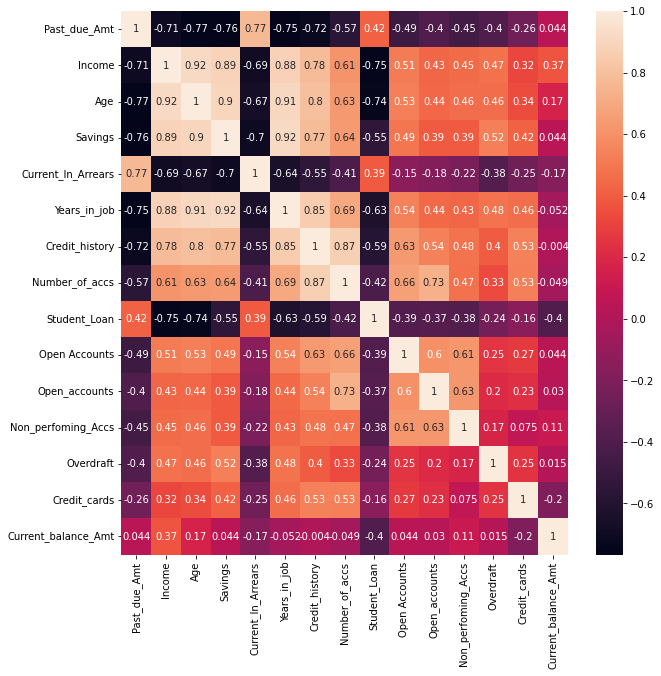

In [21]:
# save the top 20 numerical features in a list
top_num_features = ANOVA_F_table.iloc[:15,0].to_list()
# calculate pair-wise correlations between them
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True);


Define a helper function to drop the categorical features whose chi-square p_valuesand  numerical featureswhose prability F-Statistic  are above 0.05 level of signficance
and  numerical features with high multicollinearity (set treshold 0.95)

In [26]:

drop_columns_list = ANOVA_F_table.iloc[15:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[3:, 0].to_list())
drop_columns_list.extend(['Age'])
def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)


In [27]:
# apply to X_train
col_to_drop(X_train, drop_columns_list)

### Creating dummy variables

In [31]:
 # function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)

    df = pd.concat([df, df_dummies], axis = 1)
    return df
# apply to our final four categorical variables
X_train = dummy_creation(X_train, ['Province', 'Home_ownership', 'Grade'])


### Update the test data set with all data cleaning procedures performed so far

In [32]:
# emp_length_converter(X_test, 'emp_length')
# loan_term_converter(X_test, 'term')
col_to_drop(X_test, drop_columns_list)
X_test = dummy_creation(X_test, ['Province', 'Home_ownership', 'Grade'])
# reindex the dummied test set variables to make sure all the feature columns␣
#in the train set are also available in the test set
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

### WoE Binning/Feature Engineering
We will analyze both categorical and numerical features based on their categorical/binned WoEs
and IVs and then combine some of these binned categories together through a custom Python Class
with fit_transform method


In [33]:
 # Create copies of the 4 training sets to be preprocessed using WoE
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

### Analyze WoEs and IVs of discrete features

In [34]:
# The function takes 3 arguments: a dataframe (X_train_prepr), a string (column␣
# name), and a dataframe (y_train_prepr).
# The function returns a dataframe as a result.
def woe_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], 
                   axis = 1)
    df = df.iloc[:, [0, 1, 3]]

    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


In [35]:
# We set the default style of the graphs to the seaborn style.
sns.set()
# Below we define a function for plotting WoE across categories that takes 2␣
#arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

### Grade

In [36]:
df_temp = woe_discrete(X_train_prepr, 'Grade', y_train_prepr)
df_temp


C:\Users\Francis.Yego\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,AA,2200,0.000000,0.275000,0.0,2200.0,0.000000,0.429017,-inf,NaN,NaN,inf
1,BB,645,0.000000,0.080625,0.0,645.0,0.000000,0.125780,-inf,0.000000,NaN,inf
2,CC,430,0.000000,0.053750,0.0,430.0,0.000000,0.083853,-inf,0.000000,NaN,inf
3,DD,219,0.000000,0.027375,0.0,219.0,0.000000,0.042707,-inf,0.000000,NaN,inf
4,EE,380,0.000000,0.047500,0.0,380.0,0.000000,0.074103,-inf,0.000000,NaN,inf
5,FF,1495,0.161204,0.186875,241.0,1254.0,0.083914,0.244540,-1.06959,0.161204,inf,inf
6,GG,2631,1.000000,0.328875,2631.0,0.0,0.916086,0.000000,inf,0.838796,inf,inf


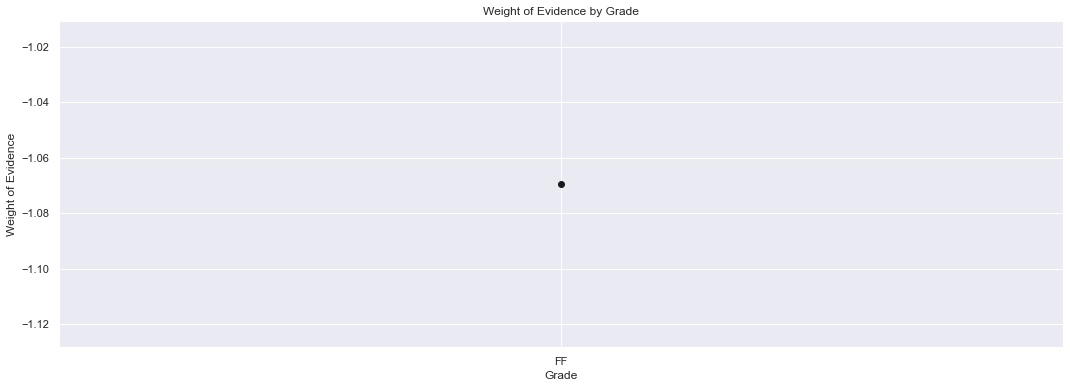

In [37]:
 plot_by_woe(df_temp)


### Home_ownership

In [39]:
df_temp = woe_discrete(X_train_prepr, 'Home_ownership', y_train_prepr)
df_temp

,Home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Own Home,3533,0.008774,0.441625,31.0,3502.0,0.010794,0.682917,-4.147395,NaN,NaN,3.817368
1,Mortgage,279,0.064516,0.034875,18.0,261.0,0.006267,0.050897,-2.094442,0.055742,2.052954,3.817368
2,Rent,4188,0.674069,0.523500,2823.0,1365.0,0.982939,0.266186,1.306353,0.609553,3.400794,3.817368


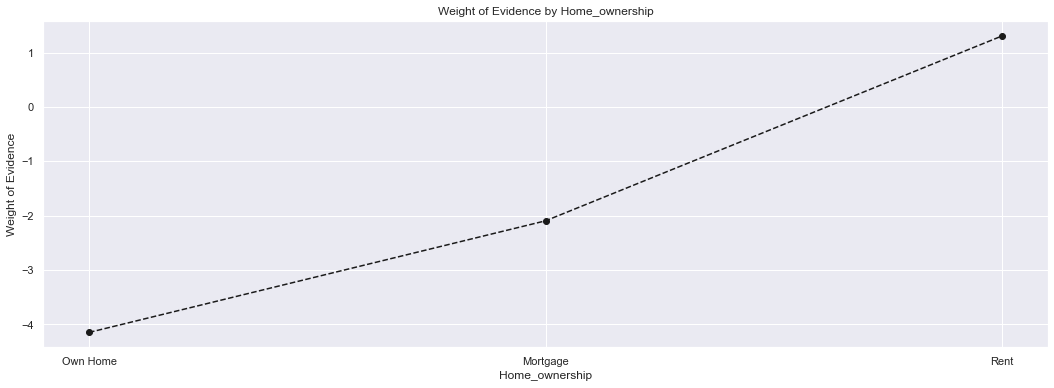

In [40]:
plot_by_woe(df_temp)

We can see from the above graph that there is a continuous increase in WoE across the different
home ownership. Therefore, we do not need to combine any features together and should leave all these  3 as they are
Note that there are no missing values in the grade column, otherwise we would have created a
separate and independent category for all Missing values, that would never be combined with any
other category. We will come across this scenario when working through other features.
home_ownership

In [ ]:
verification_status

In [41]:
X.columns

Index(['gender', 'Age', 'Years_in_job', 'Income', 'Province', 'Savings',
       'Home_ownership', 'Credit_history', 'Number_of_accs', 'Open_accounts',
       'Credit_cards', 'Home_loan', 'Overdraft', 'Student_Loan',
       'Non_perfoming_Accs', 'Open Accounts', 'Current_In_Arrears',
       'Current_balance_Amt', 'Past_due_Amt', 'No_of_enquiries', 'Grade'],
      dtype='object')

### Analyze WoEs and IVs of numeric features

In [42]:
# We define a function to calculate WoE of continuous variables. This is same␣
#as the function we defined earlier for discrete variables.
# The only difference are the 2 commented lines of code in the function that␣
#results in the df being sorted by continuous variable values
def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()],
                   axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [44]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Years_in_job', y_train_prepr)
df_temp


C:\Users\Francis.Yego\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Years_in_job,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,541,0.717190,0.067625,388.0,153.0,0.135097,0.029836,1.510274,NaN,NaN,inf
1,2,581,0.719449,0.072625,418.0,163.0,0.145543,0.031786,1.521438,0.002259,0.011164,inf
2,3,541,0.728281,0.067625,394.0,147.0,0.137187,0.028666,1.565625,0.008832,0.044187,inf
3,4,287,0.728223,0.035875,209.0,78.0,0.072772,0.015211,1.565332,0.000058,0.000293,inf
4,5,294,0.734694,0.036750,216.0,78.0,0.075209,0.015211,1.598277,0.006471,0.032944,inf
5,6,277,0.599278,0.034625,166.0,111.0,0.057799,0.021646,0.982165,0.135416,0.616112,inf
6,7,316,0.626582,0.039500,198.0,118.0,0.068942,0.023011,1.097289,0.027304,0.115125,inf
7,8,315,0.682540,0.039375,215.0,100.0,0.074861,0.019501,1.345175,0.055957,0.247885,inf
8,9,317,0.646688,0.039625,205.0,112.0,0.071379,0.021841,1.184218,0.035852,0.160957,inf
9,10,304,0.641447,0.038000,195.0,109.0,0.067897,0.021256,1.161359,0.005240,0.022859,inf


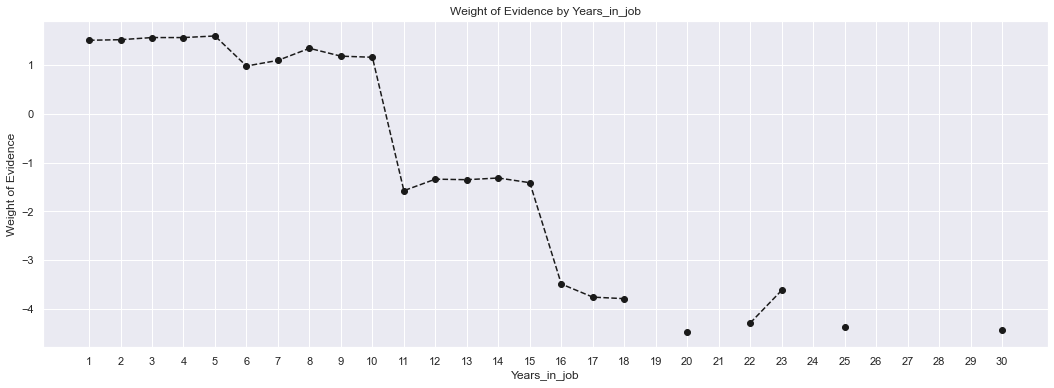

In [45]:
 plot_by_woe(df_temp)

### Income

In [48]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Income', y_train_prepr)
df_temp


C:\Users\Francis.Yego\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Income,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,30000,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,NaN,NaN,inf
1,30001,1,1.0,0.000125,1.0,0.0,0.000348,0.000000,inf,1.0,inf,inf
2,30007,1,1.0,0.000125,1.0,0.0,0.000348,0.000000,inf,0.0,NaN,inf
3,30055,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,1.0,inf,inf
4,30058,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
7664,149968,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf
7665,149970,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf
7666,149976,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf
7667,149991,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf


In [56]:
#  plot_by_woe(df_temp)

## Savings

In [50]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Savings', y_train_prepr)
df_temp

C:\Users\Francis.Yego\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Savings,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,648,1,1.0,0.000125,1.0,0.0,0.000348,0.000000,inf,NaN,NaN,inf
1,656,1,1.0,0.000125,1.0,0.0,0.000348,0.000000,inf,0.0,NaN,inf
2,661,1,1.0,0.000125,1.0,0.0,0.000348,0.000000,inf,0.0,NaN,inf
3,670,1,1.0,0.000125,1.0,0.0,0.000348,0.000000,inf,0.0,NaN,inf
4,681,1,1.0,0.000125,1.0,0.0,0.000348,0.000000,inf,0.0,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
7606,442929,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf
7607,443043,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf
7608,443535,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf
7609,444239,1,0.0,0.000125,0.0,1.0,0.000000,0.000195,-inf,0.0,NaN,inf


In [ ]:
#  plot_by_woe(df_temp)

### Past_due_Amt

In [52]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Past_due_Amt', y_train_prepr)
df_temp


C:\Users\Francis.Yego\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Past_due_Amt,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,3812,0.012854,0.476500,49.0,3763.0,0.017061,0.733814,-3.761444,NaN,NaN,inf
1,4050.0,4,0.500000,0.000500,2.0,2.0,0.000696,0.000390,0.579707,0.487146,4.341151,inf
2,4080.0,10,0.200000,0.001250,2.0,8.0,0.000696,0.001560,-0.806587,0.300000,1.386294,inf
3,4110.0,13,0.538462,0.001625,7.0,6.0,0.002437,0.001170,0.733858,0.338462,1.540445,inf
4,4140.0,1,1.000000,0.000125,1.0,0.0,0.000348,0.000000,inf,0.461538,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
300,20650.0,1,1.000000,0.000125,1.0,0.0,0.000348,0.000000,inf,0.400000,inf,inf
301,20720.0,4,1.000000,0.000500,4.0,0.0,0.001393,0.000000,inf,0.000000,NaN,inf
302,20790.0,3,0.666667,0.000375,2.0,1.0,0.000696,0.000195,1.272854,0.333333,inf,inf
303,20860.0,2,1.000000,0.000250,2.0,0.0,0.000696,0.000000,inf,0.333333,inf,inf


In [54]:
#  plot_by_woe(df_temp)

### Credit_cards

In [55]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Credit_cards', y_train_prepr)
df_temp

C:\Users\Francis.Yego\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Credit_cards,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,7332,0.391708,0.916500,2872.0,4460.0,1.0,0.869735,0.139567,NaN,NaN,inf
1,1,169,0.000000,0.021125,0.0,169.0,0.0,0.032956,-inf,0.391708,inf,inf
2,2,179,0.000000,0.022375,0.0,179.0,0.0,0.034906,-inf,0.000000,NaN,inf
3,3,158,0.000000,0.019750,0.0,158.0,0.0,0.030811,-inf,0.000000,NaN,inf
4,4,162,0.000000,0.020250,0.0,162.0,0.0,0.031591,-inf,0.000000,NaN,inf


In [43]:
X_train_num.columns

Index(['Age', 'Years_in_job', 'Income', 'Savings', 'Credit_history',
       'Number_of_accs', 'Open_accounts', 'Credit_cards', 'Home_loan',
       'Overdraft', 'Student_Loan', 'Non_perfoming_Accs', 'Open Accounts',
       'Current_In_Arrears', 'Current_balance_Amt', 'Past_due_Amt',
       'No_of_enquiries'],
      dtype='object')

In [57]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Number_of_accs', y_train_prepr)
df_temp

C:\Users\Francis.Yego\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Number_of_accs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,176,0.255682,0.022000,45.0,131.0,0.015669,0.025546,-0.488828,NaN,NaN,inf
1,2,192,0.927083,0.024000,178.0,14.0,0.061978,0.002730,3.122433,0.671402,3.611261,inf
2,3,185,0.443243,0.023125,82.0,103.0,0.028552,0.020086,0.351697,0.483840,2.770736,inf
3,4,170,0.876471,0.021250,149.0,21.0,0.051880,0.004095,2.539131,0.433227,2.187434,inf
4,5,170,0.635294,0.021250,108.0,62.0,0.037604,0.012090,1.134704,0.241176,1.404427,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15,0.000000,0.001875,0.0,15.0,0.000000,0.002925,-inf,0.000000,NaN,inf
96,97,12,0.000000,0.001500,0.0,12.0,0.000000,0.002340,-inf,0.000000,NaN,inf
97,98,10,0.000000,0.001250,0.0,10.0,0.000000,0.001950,-inf,0.000000,NaN,inf
98,99,16,0.000000,0.002000,0.0,16.0,0.000000,0.003120,-inf,0.000000,NaN,inf


In [58]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Open Accounts', y_train_prepr)
df_temp

C:\Users\Francis.Yego\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Open Accounts,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,2086,0.606424,0.260750,1265.0,821.0,0.440460,0.160101,1.012011,NaN,NaN,inf
1,2,4149,0.355989,0.518625,1477.0,2672.0,0.514276,0.521061,-0.013107,0.250434,1.025119,inf
2,3,1717,0.075713,0.214625,130.0,1587.0,0.045265,0.309477,-1.922359,0.280276,1.909252,inf
3,4,48,0.000000,0.006000,0.0,48.0,0.000000,0.009360,-inf,0.075713,inf,inf


In [59]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Current_In_Arrears', y_train_prepr)
df_temp

,Current_In_Arrears,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,3812,0.012854,0.476500,49.0,3763.0,0.017061,0.733814,-3.761444,NaN,NaN,3.656705
1,1,1778,0.700787,0.222250,1246.0,532.0,0.433844,0.103744,1.430757,0.687933,5.192202,3.656705
2,2,2151,0.672710,0.268875,1447.0,704.0,0.503830,0.137285,1.300176,0.028077,0.130581,3.656705
3,3,259,0.501931,0.032375,130.0,129.0,0.045265,0.025156,0.587429,0.170780,0.712747,3.656705


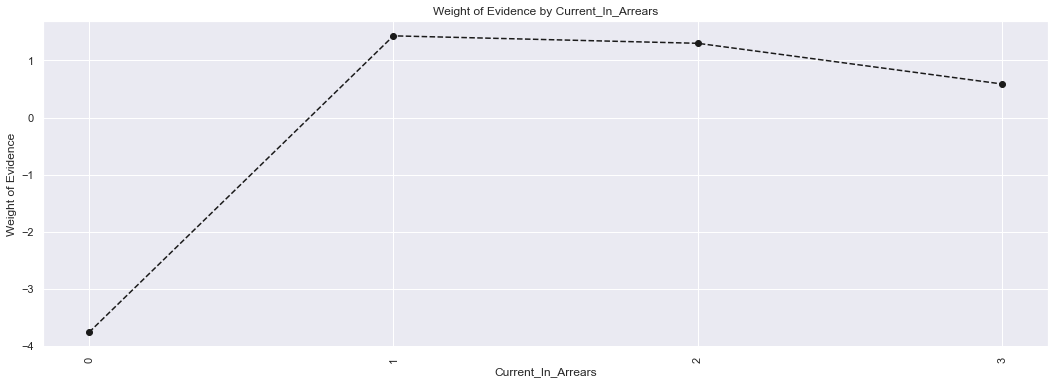

In [60]:
plot_by_woe(df_temp, 90)


In [ ]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Past_due_Amt', y_train_prepr)
df_temp

In [63]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Student_Loan', y_train_prepr)
df_temp

,Student_Loan,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,6027,0.241745,0.753375,1457.0,4570.0,0.507312,0.891186,-0.563427,NaN,NaN,0.796023
1,1,1973,0.717182,0.246625,1415.0,558.0,0.492688,0.108814,1.510233,0.475436,2.07366,0.796023


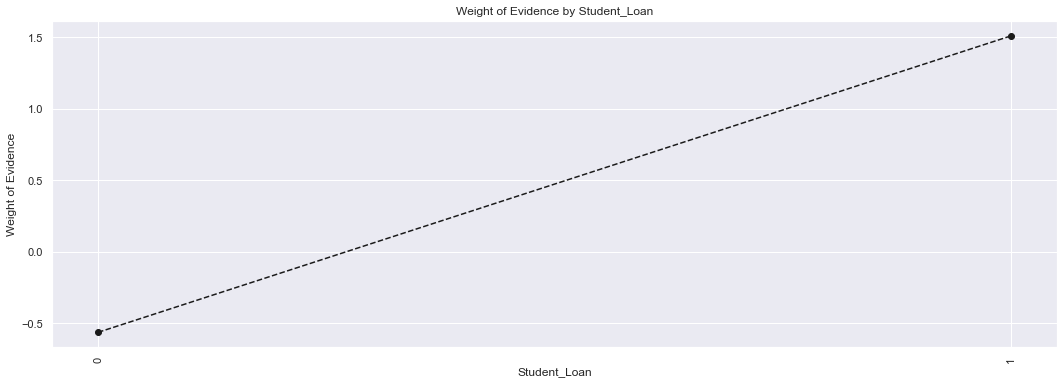

In [64]:
plot_by_woe(df_temp, 90)


In [62]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Current_balance_Amt', y_train_prepr)
df_temp

,Current_balance_Amt,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,9000,14,0.500000,0.001750,7.0,7.0,0.002437,0.001365,0.579707,NaN,NaN,inf
1,9100,24,0.750000,0.003000,18.0,6.0,0.006267,0.001170,1.678319,0.250000,1.098612,inf
2,9200,23,0.782609,0.002875,18.0,5.0,0.006267,0.000975,1.860641,0.032609,0.182322,inf
3,9300,19,0.947368,0.002375,18.0,1.0,0.006267,0.000195,3.470079,0.164760,1.609438,inf
4,9400,16,0.750000,0.002000,12.0,4.0,0.004178,0.000780,1.678319,0.197368,1.791759,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
205,29500,1,1.000000,0.000125,1.0,0.0,0.000348,0.000000,inf,0.400000,inf,inf
206,29600,4,1.000000,0.000500,4.0,0.0,0.001393,0.000000,inf,0.000000,NaN,inf
207,29700,3,0.666667,0.000375,2.0,1.0,0.000696,0.000195,1.272854,0.333333,inf,inf
208,29800,2,1.000000,0.000250,2.0,0.0,0.000696,0.000000,inf,0.333333,inf,inf


In [61]:
X_train_num.columns

Index(['Age', 'Years_in_job', 'Income', 'Savings', 'Credit_history',
       'Number_of_accs', 'Open_accounts', 'Credit_cards', 'Home_loan',
       'Overdraft', 'Student_Loan', 'Non_perfoming_Accs', 'Open Accounts',
       'Current_In_Arrears', 'Current_balance_Amt', 'Past_due_Amt',
       'No_of_enquiries'],
      dtype='object')

In [65]:
 # reconfirm shape of the 4 datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(8000, 34)
(8000,)
(2000, 34)
(2000,)


In [66]:
X_train

,Years_in_job,Income,Province,Savings,Home_ownership,Credit_history,Number_of_accs,Open_accounts,Credit_cards,Overdraft,Student_Loan,Non_perfoming_Accs,Open Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,Grade,Province:Central,Province:Eastern,Province:Nairobi,Province:Northe Eastern,Province:Nyanza,Province:Rift Valley,Province:Western,Home_ownership:Mortgage,Home_ownership:Own Home,Home_ownership:Rent,Grade:AA,Grade:BB,Grade:CC,Grade:DD,Grade:EE,Grade:FF,Grade:GG
9829,11,90907,Nairobi,104657,Rent,5,6,2,0,2,0,2,1,1,18200,5460.0,FF,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8813,6,64893,Northe Eastern,41031,Rent,8,20,5,0,0,0,8,2,2,13000,9100.0,GG,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
9954,1,59828,Nyanza,5454,Rent,2,1,1,0,2,1,0,1,1,17900,12530.0,GG,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2479,3,57879,Rift Valley,4288,Rent,2,7,2,0,0,1,3,1,1,17400,12180.0,GG,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8541,14,116742,Nairobi,147061,Own Home,11,66,9,0,0,0,7,3,0,17500,0.0,AA,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,3,41580,Central,1616,Rent,1,18,4,0,0,1,7,2,2,12500,8750.0,FF,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
7118,2,50579,Nyanza,4483,Rent,1,5,1,0,2,1,2,2,2,15200,10640.0,GG,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
494,29,140003,Nairobi,372994,Own Home,12,66,8,0,2,0,7,3,0,14000,0.0,AA,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
8490,7,90517,Nairobi,32686,Rent,6,33,9,0,1,0,10,2,2,18100,12670.0,GG,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
# This custom class will create new categorical dummy features based on the␣
,→cut-off points that we manually identified
# based on the WoE plots and IV above.
# Given the way it is structured, this class also allows a fit_transform method␣
,→to be implemented on it, thereby allowing
# us to use it as part of a scikit-learn Pipeline
class WoE_Binning(BaseEstimator, TransformerMixin):
def __init__(self, X): # no *args or *kargs
self.X = X
def fit(self, X, y = None):
return self #nothing else to do
def transform(self, X):
X_new = X.loc[:, 'grade:A': 'grade:G']
X_new['home_ownership:OWN'] = X.loc[:,'home_ownership:OWN']
X_new['home_ownership:MORTGAGE'] = X.loc[:,'home_ownership:MORTGAGE']
X_new['home_ownership:OTHER_NONE_RENT'] = sum([X['home_ownership:OTHER'],
                                               X['home_ownership:NONE'], X['home_ownership:RENT']])
X_new = pd.concat([X_new, X.loc[:, 'verification_status:Not Verified':'verification_status:Verified']
                  ], axis = 1)
# For the purpose of this column, we keep debt_consolidation (due to␣
#volume) and credit_card (due to unique characteristics) as separate␣cateogories
# These categories have very few observations: educational,␣
#renewable_energy, vacation, house, wedding, car
# car is the least risky so we will combine it with the other 2 least␣
#risky categories: home_improvement and major_purchase
# educational, renewable_energy (both low observations) will be␣
#combined with small_business and moving
# vacation, house and wedding (remaining 3 with low observations) will␣
#be combined with medical and other
X_new['purpose:debt_consolidation'] = X.loc[:,'purpose:debt_consolidation']
X_new['purpose:credit_card'] = X.loc[:,'purpose:credit_card']
X_new['purpose:major_purch__car__home_impr'] = sum([X['purpose:
,→major_purchase'], X['purpose:car'], X['purpose:home_improvement']])
X_new['purpose:educ__ren_en__sm_b__mov'] = sum([X['purpose:educational']
                                                , X['purpose:renewable_energy'],
                                                X['purpose:small_business'],X['purpose:moving']])
X_new['purpose:vacation__house__wedding__med__oth'] = sum([X['purpose:vacation'], X['purpose:house'],
                                                           X['purpose:wedding'],X['purpose:medical'], 
                                                           X['purpose:other']])

X_new['term:36'] = np.where((X['term'] == 36), 1, 0)
X_new['term:60'] = np.where((X['term'] == 60), 1, 0)
X_new['int_rate:<7.071'] = np.where((X['int_rate'] <= 7.071), 1, 0)
X_new['int_rate:7.071-10.374'] = np.where((X['int_rate'] > 7.071) &␣
,→(X['int_rate'] <= 10.374), 1, 0)
X_new['int_rate:10.374-13.676'] = np.where((X['int_rate'] > 10.374) &␣
,→(X['int_rate'] <= 13.676), 1, 0)
X_new['int_rate:13.676-15.74'] = np.where((X['int_rate'] > 13.676) &␣
,→(X['int_rate'] <= 15.74), 1, 0)
X_new['int_rate:15.74-20.281'] = np.where((X['int_rate'] > 15.74) &␣
,→(X['int_rate'] <= 20.281), 1, 0)
X_new['int_rate:>20.281'] = np.where((X['int_rate'] > 20.281), 1, 0)
X_new['annual_inc:missing'] = np.where(X['annual_inc'].isnull(), 1, 0)
X_new['annual_inc:<28,555'] = np.where((X['annual_inc'] <= 28555), 1, 0)
X_new['annual_inc:28,555-37,440'] = np.where((X['annual_inc'] > 28555)␣
,→& (X['annual_inc'] <= 37440), 1, 0)
X_new['annual_inc:37,440-61,137'] = np.where((X['annual_inc'] > 37440)␣
,→& (X['annual_inc'] <= 61137), 1, 0)
X_new['annual_inc:61,137-81,872'] = np.where((X['annual_inc'] > 61137)␣
,→& (X['annual_inc'] <= 81872), 1, 0)
X_new['annual_inc:81,872-102,606'] = np.where((X['annual_inc'] > 81872)␣
,→& (X['annual_inc'] <= 102606), 1, 0)
X_new['annual_inc:102,606-120,379'] = np.where((X['annual_inc'] >␣
,→102606) & (X['annual_inc'] <= 120379), 1, 0)
X_new['annual_inc:120,379-150,000'] = np.where((X['annual_inc'] >␣
,→120379) & (X['annual_inc'] <= 150000), 1, 0)
X_new['annual_inc:>150K'] = np.where((X['annual_inc'] > 150000), 1, 0)
X_new['dti:<=1.6'] = np.where((X['dti'] <= 1.6), 1, 0)
X_new['dti:1.6-5.599'] = np.where((X['dti'] > 1.6) & (X['dti'] <= 5.
,→599), 1, 0)
X_new['dti:5.599-10.397'] = np.where((X['dti'] > 5.599) & (X['dti'] <=␣
,→10.397), 1, 0)
X_new['dti:10.397-15.196'] = np.where((X['dti'] > 10.397) & (X['dti']␣
,→<= 15.196), 1, 0)
X_new['dti:15.196-19.195'] = np.where((X['dti'] > 15.196) & (X['dti']␣
,→<= 19.195), 1, 0)
X_new['dti:19.195-24.794'] = np.where((X['dti'] > 19.195) & (X['dti']␣
,→<= 24.794), 1, 0)
X_new['dti:24.794-35.191'] = np.where((X['dti'] > 24.794) & (X['dti']␣
,→<= 35.191), 1, 0)
X_new['dti:>35.191'] = np.where((X['dti'] > 35.191), 1, 0)
X_new['inq_last_6mths:missing'] = np.where(X['inq_last_6mths'].
,→isnull(), 1, 0)
X_new['inq_last_6mths:0'] = np.where((X['inq_last_6mths'] == 0), 1, 0)
X_new['inq_last_6mths:1-2'] = np.where((X['inq_last_6mths'] >= 1) &␣
,→(X['inq_last_6mths'] <= 2), 1, 0)
60
X_new['inq_last_6mths:3-4'] = np.where((X['inq_last_6mths'] >= 3) &␣
,→(X['inq_last_6mths'] <= 4), 1, 0)
X_new['inq_last_6mths:>4'] = np.where((X['inq_last_6mths'] > 4), 1, 0)
# We will discretize on the deciles for revol_util
X_new['revol_util:missing'] = np.where(X['revol_util'].isnull(), 1, 0)
X_new['revol_util:<0.1'] = np.where((X['revol_util'] <= 0.1), 1, 0)
X_new['revol_util:0.1-0.2'] = np.where((X['revol_util'] > 0.1) &␣
,→(X['revol_util'] <= 0.2), 1, 0)
X_new['revol_util:0.2-0.3'] = np.where((X['revol_util'] > 0.2) &␣
,→(X['revol_util'] <= 0.3), 1, 0)
X_new['revol_util:0.3-0.4'] = np.where((X['revol_util'] > 0.3) &␣
,→(X['revol_util'] <= 0.4), 1, 0)
X_new['revol_util:0.4-0.5'] = np.where((X['revol_util'] > 0.4) &␣
,→(X['revol_util'] <= 0.5), 1, 0)
X_new['revol_util:0.5-0.6'] = np.where((X['revol_util'] > 0.5) &␣
,→(X['revol_util'] <= 0.6), 1, 0)
X_new['revol_util:0.6-0.7'] = np.where((X['revol_util'] > 0.6) &␣
,→(X['revol_util'] <= 0.7), 1, 0)
X_new['revol_util:0.7-0.8'] = np.where((X['revol_util'] > 0.7) &␣
,→(X['revol_util'] <= 0.8), 1, 0)
X_new['revol_util:0.8-0.9'] = np.where((X['revol_util'] > 0.8) &␣
,→(X['revol_util'] <= 0.9), 1, 0)
X_new['revol_util:0.9-1.0'] = np.where((X['revol_util'] > 0.9) &␣
,→(X['revol_util'] <= 1.0), 1, 0)
X_new['revol_util:>1.0'] = np.where((X['revol_util'] > 1.0), 1, 0)
X_new['out_prncp:<1,286'] = np.where((X['out_prncp'] <= 1286), 1, 0)
X_new['out_prncp:1,286-6,432'] = np.where((X['out_prncp'] > 1286) &␣
,→(X['out_prncp'] <= 6432), 1, 0)
X_new['out_prncp:6,432-9,005'] = np.where((X['out_prncp'] > 6432) &␣
,→(X['out_prncp'] <= 9005), 1, 0)
X_new['out_prncp:9,005-10,291'] = np.where((X['out_prncp'] > 9005) &␣
,→(X['out_prncp'] <= 10291), 1, 0)
X_new['out_prncp:10,291-15,437'] = np.where((X['out_prncp'] > 10291) &␣
,→(X['out_prncp'] <= 15437), 1, 0)
X_new['out_prncp:>15,437'] = np.where((X['out_prncp'] > 15437), 1, 0)
X_new['total_pymnt:<10,000'] = np.where((X['total_pymnt'] <= 10000), 1,␣
,→0)
X_new['total_pymnt:10,000-15,000'] = np.where((X['total_pymnt'] >␣
,→10000) & (X['total_pymnt'] <= 15000), 1, 0)
X_new['total_pymnt:15,000-20,000'] = np.where((X['total_pymnt'] >␣
,→15000) & (X['total_pymnt'] <= 20000), 1, 0)
X_new['total_pymnt:20,000-25,000'] = np.where((X['total_pymnt'] >␣
,→20000) & (X['total_pymnt'] <= 25000), 1, 0)
X_new['total_pymnt:>25,000'] = np.where((X['total_pymnt'] > 25000), 1,␣
,→0)
61
X_new['total_rec_int:<1,089'] = np.where((X['total_rec_int'] <= 1089),␣
,→1, 0)
X_new['total_rec_int:1,089-2,541'] = np.where((X['total_rec_int'] >␣
,→1089) & (X['total_rec_int'] <= 2541), 1, 0)
X_new['total_rec_int:2,541-4,719'] = np.where((X['total_rec_int'] >␣
,→2541) & (X['total_rec_int'] <= 4719), 1, 0)
X_new['total_rec_int:4,719-7,260'] = np.where((X['total_rec_int'] >␣
,→4719) & (X['total_rec_int'] <= 7260), 1, 0)
X_new['total_rec_int:>7,260'] = np.where((X['total_rec_int'] > 7260),␣
,→1, 0)
X_new['total_rev_hi_lim:missing'] = np.where(X['total_rev_hi_lim'].
,→isnull(), 1, 0)
X_new['total_rev_hi_lim:<6,381'] = np.where((X['total_rev_hi_lim'] <=␣
,→6381), 1, 0)
X_new['total_rev_hi_lim:6,381-19,144'] = np.
,→where((X['total_rev_hi_lim'] > 6381) & (X['total_rev_hi_lim'] <= 19144), 1,␣
,→0)
X_new['total_rev_hi_lim:19,144-25,525'] = np.
,→where((X['total_rev_hi_lim'] > 19144) & (X['total_rev_hi_lim'] <= 25525), 1,␣
,→0)
X_new['total_rev_hi_lim:25,525-35,097'] = np.
,→where((X['total_rev_hi_lim'] > 25525) & (X['total_rev_hi_lim'] <= 35097), 1,␣
,→0)
X_new['total_rev_hi_lim:35,097-54,241'] = np.
,→where((X['total_rev_hi_lim'] > 35097) & (X['total_rev_hi_lim'] <= 54241), 1,␣
,→0)
X_new['total_rev_hi_lim:54,241-79,780'] = np.
,→where((X['total_rev_hi_lim'] > 54241) & (X['total_rev_hi_lim'] <= 79780), 1,␣
,→0)
X_new['total_rev_hi_lim:>79,780'] = np.where((X['total_rev_hi_lim'] >␣
,→79780), 1, 0)
X_new['mths_since_earliest_cr_line:missing'] = np.
,→where(X['mths_since_earliest_cr_line'].isnull(), 1, 0)
X_new['mths_since_earliest_cr_line:<125'] = np.
,→where((X['mths_since_earliest_cr_line'] <= 125), 1, 0)
X_new['mths_since_earliest_cr_line:125-167'] = np.
,→where((X['mths_since_earliest_cr_line'] > 125) &␣
,→(X['mths_since_earliest_cr_line'] <= 167), 1, 0)
X_new['mths_since_earliest_cr_line:167-249'] = np.
,→where((X['mths_since_earliest_cr_line'] > 167) &␣
,→(X['mths_since_earliest_cr_line'] <= 249), 1, 0)
X_new['mths_since_earliest_cr_line:249-331'] = np.
,→where((X['mths_since_earliest_cr_line'] > 249) &␣
,→(X['mths_since_earliest_cr_line'] <= 331), 1, 0)
62
X_new['mths_since_earliest_cr_line:331-434'] = np.
,→where((X['mths_since_earliest_cr_line'] > 331) &␣
,→(X['mths_since_earliest_cr_line'] <= 434), 1, 0)
X_new['mths_since_earliest_cr_line:>434'] = np.
,→where((X['mths_since_earliest_cr_line'] > 434), 1, 0)
X_new['mths_since_issue_d:<79'] = np.where((X['mths_since_issue_d'] <=␣
,→79), 1, 0)
X_new['mths_since_issue_d:79-89'] = np.where((X['mths_since_issue_d'] >␣
,→79) & (X['mths_since_issue_d'] <= 89), 1, 0)
X_new['mths_since_issue_d:89-100'] = np.where((X['mths_since_issue_d']␣
,→> 89) & (X['mths_since_issue_d'] <= 100), 1, 0)
X_new['mths_since_issue_d:100-122'] = np.where((X['mths_since_issue_d']␣
,→> 100) & (X['mths_since_issue_d'] <= 122), 1, 0)
X_new['mths_since_issue_d:>122'] = np.where((X['mths_since_issue_d'] >␣
,→122), 1, 0)
X_new['mths_since_last_credit_pull_d:missing'] = np.
,→where(X['mths_since_last_credit_pull_d'].isnull(), 1, 0)
X_new['mths_since_last_credit_pull_d:<56'] = np.where((X['mths_since_last_credit_pull_d'] <= 56),
                                                      1, 0)
X_new['mths_since_last_credit_pull_d:56-61'] = np.where((X['mths_since_last_credit_pull_d'] > 56) &␣
        (X['mths_since_last_credit_pull_d'] <= 61), 1, 0)
X_new['mths_since_last_credit_pull_d:61-75'] = np.
,→where((X['mths_since_last_credit_pull_d'] > 61) &␣
,→(X['mths_since_last_credit_pull_d'] <= 75), 1, 0)
X_new['mths_since_last_credit_pull_d:>75'] = np.
,→where((X['mths_since_last_credit_pull_d'] > 75), 1, 0)
X_new.drop(columns = ref_categories, inplace = True)
return X_new
# we could have also structured this class without the last drop statement and␣
#without creating categories out of the
# feature categories. But doing the way we have done here allows us to keep a␣
#proper track of the categories, if required

In [69]:
X.columns

Index(['gender', 'Age', 'Years_in_job', 'Income', 'Province', 'Savings',
       'Home_ownership', 'Credit_history', 'Number_of_accs', 'Open_accounts',
       'Credit_cards', 'Home_loan', 'Overdraft', 'Student_Loan',
       'Non_perfoming_Accs', 'Open Accounts', 'Current_In_Arrears',
       'Current_balance_Amt', 'Past_due_Amt', 'No_of_enquiries', 'Grade'],
      dtype='object')

In [98]:
cols=['Income', 'Savings',
       'Home_ownership', 'Credit_history','Open_accounts',
       'Credit_cards', 'Overdraft', 'Student_Loan',
       'Non_perfoming_Accs', 'Open Accounts', 'Current_In_Arrears',
       'Current_balance_Amt', 'Past_due_Amt','Grade']

In [170]:
df2=loan_data[['Income', 'Savings',
       'Home_ownership', 'Credit_history','Open_accounts',
       'Credit_cards', 'Overdraft', 'Student_Loan',
       'Non_perfoming_Accs', 'Open Accounts', 'Current_In_Arrears',
       'Current_balance_Amt', 'Past_due_Amt','Grade', 'Def']]

In [99]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [100]:
x_train=X_train[cols]
x_test=X_test[cols]
for j in cols:
    x_train[j]=le.fit_transform( x_train[j])
    x_test[j]=le.fit_transform( x_test[j])

In [171]:
x_test

,Intercept,Income,Savings,Home_ownership,Credit_history,Open_accounts,Credit_cards,Overdraft,Student_Loan,Non_perfoming_Accs,Open Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,Grade
6391,1,1289,1225,1,11,4,0,0,0,15,2,0,82,0,2
9905,1,1099,1039,2,10,8,0,2,0,6,2,3,60,11,3
1258,1,1541,1483,1,11,3,0,2,0,12,2,0,36,0,1
5359,1,966,1273,1,9,1,0,2,0,6,1,0,99,0,0
9439,1,1098,886,2,7,7,0,1,0,11,2,3,110,164,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,1,1615,1868,1,18,7,4,4,0,4,1,0,39,0,0
9727,1,941,962,2,5,4,0,0,0,7,1,2,97,31,5
1685,1,704,624,2,7,6,0,2,0,7,1,2,62,116,5
2007,1,1052,1326,1,7,8,0,2,0,10,1,0,106,0,0


In [1]:
 #code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score','Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_pred1 = clf.predict_proba(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred,average='macro'),
                     'Recall_score': metrics.recall_score(y_test, y_pred,average='macro'),
                     'F1_score': metrics.f1_score(y_test, y_pred,average='macro'),
                     'Log Loss':metrics.log_loss(y_test, y_pred1),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                     
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

In [101]:
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')
pipeline = Pipeline(steps=[('model', reg)])
# define cross-validation criteria. RepeatedStratifiedKFold automatially takes␣
#care of the class imbalance while splitting
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# fit and evaluate the logistic regression pipeline with cross-validation as defined in cv
scores = cross_val_score(pipeline, x_train, y_train, scoring = 'roc_auc', cv =cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1
# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))


Mean AUROC: 0.9809
Gini: 0.9618


In [102]:
 # pretty impressive scores for the first time, now let's fit the pipeline on␣the whole training set
pipeline.fit(x_train, y_train)


Pipeline(steps=[('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

### Prediction

In [103]:
# make preditions on our test set
y_hat_test = pipeline.predict(x_test)
# get the predicted probabilities
y_hat_test_proba = pipeline.predict_proba(x_test)
# select the probabilities of only the positive class (class 1 - default)
y_hat_test_proba = y_hat_test_proba[:][: , 1]

In [104]:
# we will now create a new DF with actual classes and the predicted probabilities
# create a temp y_test DF to reset its index to allow proper concaternation␣with y_hat_test_proba
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis =1)
# check the shape to make sure the number of rows is same as that in y_test
y_test_proba.shape

(2000, 2)

In [105]:
 # Rename the columns
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = x_test.index
y_test_proba.head()


,y_test_class_actual,y_hat_test_proba
6391,0,2.795270e-06
9905,0,1.055858e-02
1258,0,4.632693e-08
5359,0,1.475665e-08
9439,0,8.984903e-02


#### Confusion Matrix and AUROC on Test Set


In [106]:
 # assign a threshold value to differentiate good with bad
tr = 0.5
# crate a new column for the predicted class based on predicted probabilities and threshold
# We will determine this optimat threshold later in this project
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
# create the confusion matrix
confusion_matrix(y_test_proba['y_test_class_actual'],
                 y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.4735, 0.1675],
       [0.0005, 0.3585]])

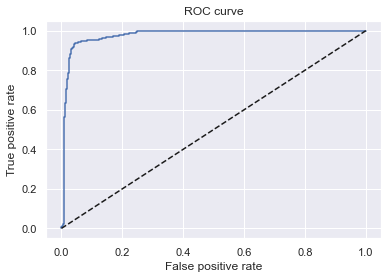

In [107]:
 # get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'],y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');


In [108]:
# Calculate the Area Under the Receiver Operating Characteristic Curve (AUROC) on our test set
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'],y_test_proba['y_hat_test_proba'])
AUROC

0.9782905800911702

In [109]:
# calculate Gini from AUROC
Gini = AUROC * 2 - 1
Gini

0.9565811601823404

In [116]:
feature_name = x_train.columns.values

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values␣
#the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(pipeline['model'].coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', pipeline['model'].intercept_[0]]
# Sort the dataframe by i

In [117]:
summary_table

,Feature name,Coefficients
1,Income,-0.000485
2,Savings,-0.000914
3,Home_ownership,-5.480293
4,Credit_history,-0.137070
5,Open_accounts,0.030855
6,Credit_cards,-0.092140
7,Overdraft,-0.072892
8,Student_Loan,-2.886249
9,Non_perfoming_Accs,-0.303839
10,Open Accounts,-0.616786


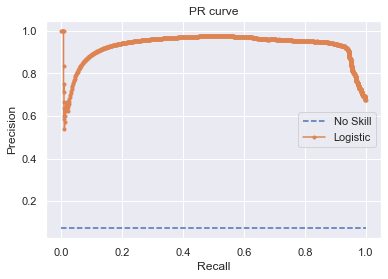

In [110]:
 #draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate inputs for the PR curve
precision, recall, thresholds =precision_recall_curve(y_test_proba['y_test_class_actual'],
                                                      y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');


In [111]:
# calculate PR AUC
auc_pr = auc(recall, precision)
auc_pr

0.928323407939819

### Applying the Model - Scorecard Creation

In [129]:
summary_table

,Feature name,Coefficients
1,Income,-0.000485
2,Savings,-0.000914
3,Home_ownership,-5.480293
4,Credit_history,-0.137070
5,Open_accounts,0.030855
6,Credit_cards,-0.092140
7,Overdraft,-0.072892
8,Student_Loan,-2.886249
9,Non_perfoming_Accs,-0.303839
10,Open Accounts,-0.616786


In [112]:
 # We create a new dataframe with one column. Its values are the values from the
    #'reference_categories' list. We name it 'Feature name'.
df_ref_categories = pd.DataFrame(cols, columns = ['Feature name'])
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['Coefficients'] = 0
df_ref_categories

,Feature name,Coefficients
0,Income,0
1,Savings,0
2,Home_ownership,0
3,Credit_history,0
4,Open_accounts,0
5,Credit_cards,0
6,Overdraft,0
7,Student_Loan,0
8,Non_perfoming_Accs,0
9,Open Accounts,0


In [118]:
#Concatenates two dataframes.
df_scorecard = pd.concat([summary_table, df_ref_categories])
# We reset the index of a dataframe.
df_scorecard.reset_index(inplace = True)
df_scorecard

,index,Feature name,Coefficients
0,1,Income,-0.000485
1,2,Savings,-0.000914
2,3,Home_ownership,-5.480293
3,4,Credit_history,-0.137070
4,5,Open_accounts,0.030855
5,6,Credit_cards,-0.092140
6,7,Overdraft,-0.072892
7,8,Student_Loan,-2.886249
8,9,Non_perfoming_Accs,-0.303839
9,10,Open Accounts,-0.616786


In [119]:
 # create a new column, called 'Original feature name', which contains the value␣
    #of the 'Feature name' column, up to the column symbol.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,Original feature name
0,1,Income,-0.000485,Income
1,2,Savings,-0.000914,Savings
2,3,Home_ownership,-5.480293,Home_ownership
3,4,Credit_history,-0.137070,Credit_history
4,5,Open_accounts,0.030855,Open_accounts
5,6,Credit_cards,-0.092140,Credit_cards
6,7,Overdraft,-0.072892,Overdraft
7,8,Student_Loan,-2.886249,Student_Loan
8,9,Non_perfoming_Accs,-0.303839,Non_perfoming_Accs
9,10,Open Accounts,-0.616786,Open Accounts


In [130]:
# Define the min and max threshholds for our scorecard
min_score = 300
max_score = 850

In [131]:
 # calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within the original feature name
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the␣
#multiplication of the coefficient by the ratio of the differences between
# maximum & minimum score and maximum & minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score- min_score) / (max_sum_coef - min_sum_coef)
# update the calculated score of the Intercept (i.e. the default score for each␣loan)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) *(max_score - min_score) + min_score
# round the values of the 'Score - Calculation' column and store them in a new␣column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,1,Income,-0.000485,Income,876.541111,877.0,0.458889,598.0
1,2,Savings,-0.000914,Savings,-0.031128,-0.0,0.031128,-0.0
2,3,Home_ownership,-5.480293,Home_ownership,-186.720665,-187.0,-0.279335,-187.0
3,4,Credit_history,-0.137070,Credit_history,-4.670163,-5.0,-0.329837,-5.0
4,5,Open_accounts,0.030855,Open_accounts,1.051282,1.0,-0.051282,1.0
5,6,Credit_cards,-0.092140,Credit_cards,-3.139329,-3.0,0.139329,-3.0
6,7,Overdraft,-0.072892,Overdraft,-2.483508,-2.0,0.483508,-2.0
7,8,Student_Loan,-2.886249,Student_Loan,-98.338224,-98.0,0.338224,-98.0
8,9,Non_perfoming_Accs,-0.303839,Non_perfoming_Accs,-10.352176,-10.0,0.352176,-10.0
9,10,Open Accounts,-0.616786,Open Accounts,-21.014693,-21.0,0.014693,-21.0


In [132]:
 # check the min and max possible scores of our scorecard
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

-575.0
851.0


In [126]:
 # so both our min and max scores are out by +1. we need to manually adjust this
# Which one? We'll evaluate based on the rounding differences of the minimum category within each Original Feature Name.
pd.options.display.max_rows = 102
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,1,Income,-0.000485,Income,876.541111,877.0,0.458889
1,2,Savings,-0.000914,Savings,-0.031128,-0.0,0.031128
2,3,Home_ownership,-5.480293,Home_ownership,-186.720665,-187.0,-0.279335
3,4,Credit_history,-0.137070,Credit_history,-4.670163,-5.0,-0.329837
4,5,Open_accounts,0.030855,Open_accounts,1.051282,1.0,-0.051282
5,6,Credit_cards,-0.092140,Credit_cards,-3.139329,-3.0,0.139329
6,7,Overdraft,-0.072892,Overdraft,-2.483508,-2.0,0.483508
7,8,Student_Loan,-2.886249,Student_Loan,-98.338224,-98.0,0.338224
8,9,Non_perfoming_Accs,-0.303839,Non_perfoming_Accs,-10.352176,-10.0,0.352176
9,10,Open Accounts,-0.616786,Open Accounts,-21.014693,-21.0,0.014693


In [143]:
 # look like we can get by deducting 1 from the Intercept
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[0, 'Score - Final'] = 598
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,1,Income,-0.000485,Income,876.541111,877.0,0.458889,598.0
1,2,Savings,-0.000914,Savings,-0.031128,-0.0,0.031128,-0.0
2,3,Home_ownership,-5.480293,Home_ownership,-186.720665,-187.0,-0.279335,-187.0
3,4,Credit_history,-0.137070,Credit_history,-4.670163,-5.0,-0.329837,-5.0
4,5,Open_accounts,0.030855,Open_accounts,1.051282,1.0,-0.051282,1.0
5,6,Credit_cards,-0.092140,Credit_cards,-3.139329,-3.0,0.139329,-3.0
6,7,Overdraft,-0.072892,Overdraft,-2.483508,-2.0,0.483508,-2.0
7,8,Student_Loan,-2.886249,Student_Loan,-98.338224,-98.0,0.338224,-98.0
8,9,Non_perfoming_Accs,-0.303839,Non_perfoming_Accs,-10.352176,-10.0,0.352176,-10.0
9,10,Open Accounts,-0.616786,Open Accounts,-21.014693,-21.0,0.014693,-21.0


In [144]:
 # Recheck min and max possible scores
print(df_scorecard.groupby('Original feature name')['Score - Final'].min().sum())
print(df_scorecard.groupby('Original feature name')['Score - Final'].max().sum())


-575.0
572.0


In [160]:
x_test

,Intercept,Income,Savings,Home_ownership,Credit_history,Open_accounts,Credit_cards,Overdraft,Student_Loan,Non_perfoming_Accs,Open Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,Grade
6391,1,1289,1225,1,11,4,0,0,0,15,2,0,82,0,2
9905,1,1099,1039,2,10,8,0,2,0,6,2,3,60,11,3
1258,1,1541,1483,1,11,3,0,2,0,12,2,0,36,0,1
5359,1,966,1273,1,9,1,0,2,0,6,1,0,99,0,0
9439,1,1098,886,2,7,7,0,1,0,11,2,3,110,164,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,1,1615,1868,1,18,7,4,4,0,4,1,0,39,0,0
9727,1,941,962,2,5,4,0,0,0,7,1,2,97,31,5
1685,1,704,624,2,7,6,0,2,0,7,1,2,62,116,5
2007,1,1052,1326,1,7,8,0,2,0,10,1,0,106,0,0


In [162]:
# first create a transformed test set through our WoE_Binning custom class
# X_test_woe_transformed = woe_transform.fit_transform(X_test)
X_test_woe_transformed=x_test.copy()
# insert an Intercept column in its beginning to align with the # of rows in corecard
X_test_woe_transformed.insert(0, 'Intercept', 1)
X_test_woe_transformed.head()


,Intercept,Income,Savings,Home_ownership,Credit_history,Open_accounts,Credit_cards,Overdraft,Student_Loan,Non_perfoming_Accs,Open Accounts,Current_In_Arrears,Current_balance_Amt,Past_due_Amt,Grade
6391,1,1289,1225,1,11,4,0,0,0,15,2,0,82,0,2
9905,1,1099,1039,2,10,8,0,2,0,6,2,3,60,11,3
1258,1,1541,1483,1,11,3,0,2,0,12,2,0,36,0,1
5359,1,966,1273,1,9,1,0,2,0,6,1,0,99,0,0
9439,1,1098,886,2,7,7,0,1,0,11,2,3,110,164,4


In [163]:
 # get the list of our final scorecard scores
scorecard_scores = df_scorecard['Score - Final']
# check the shapes of test set and scorecard before doing matrix dot multiplication
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(2000, 15)
(29,)


In [165]:
 # we can see that the test set has 17 less columns than the rows in scorecard due to the reference categories
# since the reference categories will always be scored as 0 based on the scorecard,
#it is safe to add these categories to the end of test set with 0␣values
X_test_woe_transformed = pd.concat([X_test_woe_transformed, pd.DataFrame
                                    (dict.fromkeys(cols, [0] * len(X_test_woe_transformed)),
                                     index= X_test_woe_transformed.index)], axis = 1)
# Need to reshape scorecard_scores so that it is (29,1) to allow for matrix dot multiplication
scorecard_scores = scorecard_scores.values.reshape(29, 1)
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)


(2000, 43)
(29, 1)


In [166]:
 # matrix dot multiplication of test set with scorecard scores
y_scores = X_test_woe_transformed.dot(scorecard_scores)
y_scores.head()


ValueError: Dot product shape mismatch, (2000, 43) vs (29, 1)